In [8]:
import pyriemann
from pyriemann.estimation import Covariances
from pyriemann.classification import MDM
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from glob import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [9]:
pathdata = "C:/Users/pesylvestre/Documents/Informatique/BRAIL/FY2023 In-House PoC3/In-HousePOC3/in_housepoc3/data/"

In [10]:
gb = glob(pathdata+"sub-032*.csv")

In [11]:
event_id = dict(age_20_25 =1, age_25_30=2, age_30_35=3, age_35_40=4, age_55_60=5, age_60_65=6, age_65_70=7, age_70_75=8, age_75_80=9)

In [14]:
arr=np.zeros((len(gb),63,14501))

In [15]:
import pandas as pd
i = 0
for filename in gb:
    print(filename, end="\r")
    df=pd.read_csv(filename)
    #print(df.values)
    #print(df.shape)
    if df.shape[0] == 14501:
        arr[i]=df.T.values
    i=i+1

In [17]:
import csv

In [18]:
with open(pathdata+"clab.csv",'r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ',',
                           quotechar = '"')
    data = [data for data in data_iter]
data_array = np.asarray(data[0][:-1]).astype(np.int)
print(data_array)
print(data_array.shape)

[7 7 7 ... 1 1 1]
(2438,)


C:\Users\PESYLV~1\AppData\Local\Temp/ipykernel_14308/4242893162.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_array = np.asarray(data[0][:-1]).astype(np.int)


In [67]:
def is_pos_def(x):
    try:
        np.linalg.cholesky(x)
        return True
    except np.linalg.LinAlgError:
        return False

In [109]:
X = arr[:310]
y = data_array[:310]
print(type(X))
print(y)
print(X.shape, y.shape)
for a in arr:
    if is_pos_def(a):
        print(is_pos_def(a), end=" ")

<class 'numpy.ndarray'>
[7 7 7 7 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7
 7 7 7 7 7 7 2 2 2 2 2 2 2 2 2 2 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3]
(310, 63, 14501) (310,)


In [110]:
kernels, chans, samples = 1, 63, 14501
p50 = int(len(y)/2)
p75 = int(len(y)*0.75)

In [111]:
X_train      = X[0:p50,]
Y_train      = y[0:p50]
X_validate   = X[p50:p75,]
Y_validate   = y[p50:p75]
X_test       = X[p75:,]
Y_test       = y[p75:]

In [112]:
from sklearn.model_selection import train_test_split
from pyriemann.estimation import Covariances
from pyriemann.classification import MDM
from sklearn.metrics import accuracy_score

In [113]:
cov_train = Covariances('oas').fit_transform(X_train)
mdm = MDM()
mdm.fit(cov_train, Y_train)

MDM()

In [114]:
cov_val = Covariances().fit_transform(X_validate)
y_pred = mdm.predict(cov_val)

c:\users\pesylvestre\appdata\local\programs\python\python38\lib\site-packages\pyriemann\utils\distance.py:319: RuntimeWarning: divide by zero encountered in log
  d2 = (np.log(_recursive(eigvalsh, A, B))**2).sum(axis=-1)


In [115]:
accuracy = accuracy_score(Y_validate, y_pred)
print(f'Précision sur l\'ensemble de validation : {accuracy}')
print(Y_validate, y_pred)
print(Y_validate.shape)

Précision sur l'ensemble de validation : 0.42857142857142855
[2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 6 6 6 6 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3] [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 2 2 1 2 2 2 2 7 7 7 2 2 7 7 1 1 1 2 2 1
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 1 1 1 7 2 7 7 7 7 7 7 7 7 7 7 7 2 2 2 2 2
 2 2 2]
(77,)


In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
#lab = ["20-25", "25-30", "30-35", "35-40", "55-60", "60-65", "65-70", "70-75", "75_80"]

In [119]:
lab = ["20-25", "25-30", "30-35", "60-65", "65-70"]

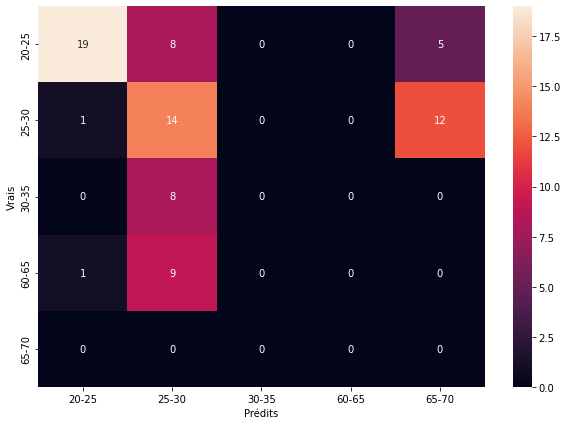

In [120]:
cm = confusion_matrix(Y_validate, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=lab, yticklabels=lab)
plt.xlabel('Prédits')
plt.ylabel('Vrais')
plt.show()